**Partons du principe que l'on a une série de Html dans le dossier 'fichiers'**

In [1]:
import glob
liste_fichiers = glob.glob("fichiers/*")

In [14]:
#Lignes à décommenter pour installer les outils utilisés ici:
#! pip install inscriptis --user
#! pip install boilerpy3 --user

import inscriptis

res_inscriptis = {}
for chemin in liste_fichiers:
    with open(chemin) as f:
        contenu = f.read()
    res_inscriptis[chemin] = inscriptis.get_text(contenu)

In [3]:
##On affiche une fraction du résultat du dernier fichier traité
print(res_inscriptis[chemin][:250])

Aller au contenu
      Menu
      Abonnez-vous 1€ le premier mois Rechercher
          Notre application
        Soyez alerté en temps réel
        avec l'application Le Figaro

        Rubriques et services du Figaro

          * Politique
         


**On peut voir qu'Inscriptis ressort beaucoup de contenu puisqu'il intègre les menus**
**Nous allons avoir un outil un peu plus perfectionné**

In [4]:
from boilerpy3 import extractors

res_boilerpy3 = {}

for chemin in liste_fichiers:
    f = open(chemin)
    contenu = f.read()
    f.close()
    BP_extractor = extractors.DefaultExtractor()
    res_boilerpy3[chemin] = BP_extractor.get_content(contenu)

In [5]:
print(res_boilerpy3[chemin][:250])

Réservé aux abonnés
Comment les microbes ont participé à la chute de l’Empire romain
DÉCRYPTAGE - Dans un livre rédigé bien avant le Covid, l’historien américain Kyle Harper, spécialiste de l’Antiquité tardive, estime que la nature a eu sa part de re


**On va essaye de visualiser la différence entre les deux fichiers pour mieux comprendre tout ça**

In [6]:
#NB: La  fonction ci-dessous pourrait être remplacée par quelque chose de plus précis  
#Par exemple avec une vectorisation par sklearn et un calcul de distance par scipy.spatial
#On choisit ici une approche simple et n'incluant pas l'installation de libraires trop lourdes

def distance_jaccard_simple(l1, l2):
    voc1 = set(l1.split())
    voc2 = set(l2.split())
    inter = voc1.intersection(voc2)
    union = voc1.union(voc2)
    if len(union)!=0:
        jaccard = len(inter)/len(union)
    else:
        jaccard = 1
    return jaccard

In [7]:
## On va comparer fichier les deux sorties res_inscriptis et res_boilerpy3 avec un indice de Jaccard
import re
matrixes = {}

for name in liste_fichiers:
    lignes1 = re.split("\n", res_inscriptis[name])
    lignes2 = re.split("\n", res_boilerpy3[name])
    matrix = [ [1]*len(lignes2) for i in range(len(lignes1))]
    for i in range(len(lignes1)):
        for j in range(len(lignes2)):
            jaccard = distance_jaccard_simple(lignes1[i], lignes2[j])
            matrix[i][j] = jaccard
    matrixes[name] = matrix

# on affiche les 5 premières lignes d'une matrice
for ligne in matrix[:5]:
    print(ligne)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012658227848101266, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.02564102564102564, 0.0, 0.0, 0.0, 0.0, 0.012195121951219513, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.1111111111111111, 0.0, 0.0, 0.1111111111111111, 0.0, 0.02702702702702703, 0.0, 0.0, 0.0, 0.1111111111111111, 0.043478260869565216, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012345679012345678, 0.0, 0.01639344262295082, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045454545454545456, 0.0, 0.0, 0.0]


In [8]:
##Constat: beaucoup de zéros
# POur plus de lisibilité, on va utiliser Pandas
import pandas as pd
df = pd.DataFrame(matrix)
print(df)

      0    1         2    3    4    5    6         7    8         9   ...  \
0    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.012658  0.0  0.000000  ...   
1    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
2    0.0  0.0  0.025641  0.0  0.0  0.0  0.0  0.012195  0.0  0.000000  ...   
3    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
4    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.012346  0.0  0.016393  ...   
..   ...  ...       ...  ...  ...  ...  ...       ...  ...       ...  ...   
367  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
368  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
369  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
370  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
371  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   

      17        18   19   20   21        22        23   24   25   26  
0   

Text(33.0, 0.5, 'inscriptis')

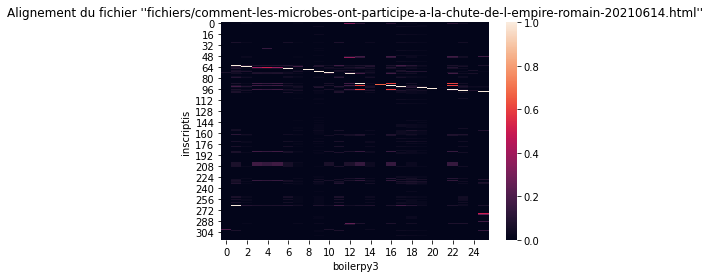

In [12]:
##NB: ne pas hésiter à exécuter la cellule deux fois si la matrice ne s'affiche pas
import numpy as np 
import seaborn as sns
ax = sns.heatmap(matrix)
ax.set_title(f"Alignement du fichier ''{name}''")
ax.set_xlabel("boilerpy3")
ax.set_ylabel("inscriptis")


On voit bien ici qu'Inscriptis "ramène" beaucoup plus de texte que boilerpipe :
- 360 lignes VS 26
- la sortie de Boilerpy correspond à une sous partie des lignes 72 à 144 de la sortie Inscriptis

Sachant qu'il y a beaucoup de lignes vides, on peut obtenir une vision plus juste en filtrant la sortie d'Inscriptis

In [10]:
from trafilatura.utils import sanitize

matrixes = {}

for name in liste_fichiers:
    lignes1 = re.split("\n", sanitize(res_inscriptis[name]))
    lignes2 = re.split("\n", sanitize(res_boilerpy3[name]))
    matrix = [ [1]*len(lignes2) for i in range(len(lignes1))]
    for i in range(len(lignes1)):
        for j in range(len(lignes2)):
            jaccard = distance_jaccard_simple(lignes1[i], lignes2[j])
            matrix[i][j] = jaccard
    matrixes[name] = matrix


In [11]:
import os
import re
os.makedirs("matrixes", exist_ok = True)

w = open("visualisation.html", "w")
for name, matrix in matrixes.items():
    filename = re.split("/", name)[-1]
    path_fig = f"matrixes/{filename}.png"
    ax = sns.heatmap(matrix)
    ax.set_title(f"Alignement du fichier ''{name}''")
    ax.set_xlabel("boilerpy3")
    ax.set_ylabel("inscriptis")
    figure = ax.get_figure()
    figure.savefig(path_fig)
    figure.clear()
    w.write(f"<h2>{filename}</h2>\n")
    w.write(f"<img src='{path_fig}'/>")
w.close()

<Figure size 432x288 with 0 Axes>

Si tout s'est bien passé, vous devriez avoir les figures pour chaque fichier traité dans un dossier "matrixes" et un document intitulé "visualisation.html" qui les récapitule

Ici on a travaillé sans vérité de terrain, simplement pour avoir une idée  plus précise de ce qu'il se passe selon que l'on utilise un outil "naïf" (type Inscriptis) ou un outil dédié (type boilerpy). Il y a aussi la famille des outils dont le but n'est pas l'extraction de texte en tant que telle mais la lisibilité (readability par exemple).

Parmi les problèmes récurrents, on peut citer:
- la langue traitée : la qualité des sorties varient fortement selon la langue traitée
- la validité Html : certains outils sont très dépendants du parsing du Html
- le temps de calcul : le temps de calcul peut varier d'un facteur 1 à 5 (voire plus dans des cas extrêmes)

Pour plus de détails sur ces différents points et sur l'évaluation des outils disponibles, vous pouvez consulter "Out-of-the-Box and into the Ditch? Multilingual Evaluation of Generic Text Extraction Tools", Barbaresi & Lejeune 2020 :

https://www.aclweb.org/anthology/2020.wac-1.2

